<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Naive Bayes
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

* En esta sesión trabajaremos con una serie de base de datos sobre letras musicales de distintos artistas. Cada uno de los `csv` se encuentra en la carpeta `dump` dentro del proyecto.
* Cada csv tiene el nombre del artista a analizar. Los archivos contienen el nombre del artista, el género musical del artista, el nombre de la canción y las letras.
* En base a esta información, se les pide un modelo generativo que pueda predecir el género de una canción a patir de la letra de una canción.
* Existen 4 géneros que se registran en la base de datos, por lo que para esta actividad trabajaremos con un Multinomial Naive Bayes.

## Ejercicio 1: Preparar el ambiente de trabajo

___
* Importe los módulos `numpy` , `pandas` , `matplotlib` , `seaborn` , `glob` y `os` siguiendo las buenas prácticas. Los últimos dos módulos permitirán realizar la importación de múltiples archivos dentro de la carpeta `dump`.

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings
# Se importa libreria para el menejo de expresiones regulares
import glob, os

> Definimos algunos aspectos de ambiente y valores por defecto.

In [29]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (10, 6)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
# Método para la selección de datos entre entrenamiento y test
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

* Para ello genere un objeto que guarde en una lista todos los archivos alojados en `dump` utilizando `glob.glob` y `os.getcwd` para extraer las rutas absolutas. Posteriormente genere un objeto `pd.DataFrame` que contenga todos los csv.
* Asegúrese de eliminar la columna `Unnamed: 0` que se genera por defecto.

In [5]:
# Generamos el listado de archivos con su path con la librería glob y lo
# almacenamos en la lista file_list
file_list = glob.glob(os.getcwd() + '/dump/*.csv')

In [8]:
# Iniciamos una lista vacia para cargar el contenido de cada archivo csv
append_csv = []
# Recorremos el listado de archivos, lo cargamos en memoria con read_csv y
# lo agregamos a la lista appappend_csv
for filename in file_list:
    append_csv.append(pd.read_csv(filename, index_col=None, header=0)
                      .drop(columns = 'Unnamed: 0')
                     )

In [10]:
# Se concatenan todos los objetos DataFrames almacenados en la lista append_csv en 1 solo DataFrame
df = pd.concat(append_csv)
# Se asigna un nombre a cada columna del DataFrame
df.columns = ['Artis', 'Genre', 'Song', 'Lyrics']

In [12]:
# Inspeccionamos los datos
df.sample(5)

,Artis,Genre,Song,Lyrics
113,Pink Floyd,rock,Yet Another Movie,"One sound, one single sound \n One kiss, one s..."
56,Pink Floyd,rock,Money,"Money, get away \n Get a good job with more pa..."
91,Britney Spears,pop,Perfect Lover,"Are we ready? Are we ready, ready? \n Yes, are..."
20,Dua Lipa,pop,Good Times (Jaime Xx Rework),"All we need is a little bit of honey, huh \n O..."
7,Pink Floyd,rock,The Scarecrow,The black and green scarecrow as everyone know...


In [13]:
# Revisamos las dimensiones de la base de datos
df.shape

(9489, 4)

> La base de datos se compone de 9489 observaciones con 4 atributos. 

## Ejercicio 2: Descripción de los datos
___
* Utilizando el objeto creado en el Ejercicio 1, genere dos gráficos de barras que resuman la siguiente información:
    - La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.
    - La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

> La cantidad de canciones registradas por cada artista, ordenado de mayor a menor.

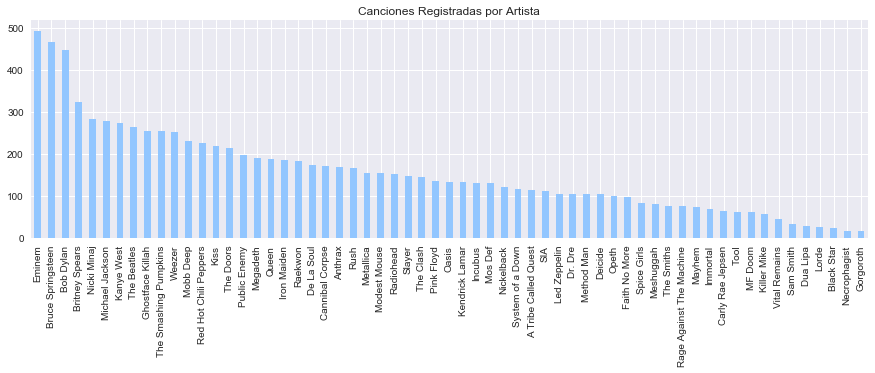

In [32]:
plt.figure(figsize=(15,4))
df["Artis"].value_counts().plot(kind='bar', title='Canciones Registradas por Artista')

> La cantidad de canciones registradas en cada género, ordenados de mayor a menor.

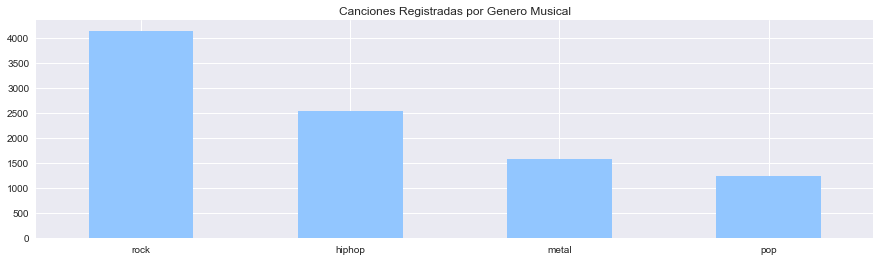

In [36]:
plt.figure(figsize=(15,4))
df["Genre"].value_counts().plot(kind='bar', rot=0, title='Canciones Registradas por Genero Musical')

In [65]:
df[df["Artis"]=="Bruce Springsteen"]

,Artis,Genre,Song,Lyrics
0,Bruce Springsteen,rock,Blinded By The Light,Madman drummers bummers and Indians in the sum...
1,Bruce Springsteen,rock,Growin' Up,Well I stood stone-like at midnight \n Suspend...
2,Bruce Springsteen,rock,Mary Queen Of Arkansas,"Mary Queen of Arkansas, it's not too early for..."
3,Bruce Springsteen,rock,Does This Bus Stop At 82nd Street?,"Hey bus driver, keep the change \n Bless your ..."
4,Bruce Springsteen,rock,Lost In The Flood,The ragamuffin gunner is returnin' home like a...
5,Bruce Springsteen,rock,The Angel,"The angel rides with hunch-backed children, po..."
6,Bruce Springsteen,rock,For You,Princess cards she sends me with her regards \...
7,Bruce Springsteen,rock,Spirit In The Night,Crazy Janey and her Mission Man \n Were back i...
8,Bruce Springsteen,rock,It's Hard To Be A Saint In The City,I had skin like leather and the diamond-hard l...
9,Bruce Springsteen,rock,The E Street Shuffle,Sparks fly on E Street when the boy prophets w...


In [64]:
df["Artis"].value_counts()

Eminem                      493
Bruce Springsteen           467
Bob Dylan                   447
Britney Spears              323
Nicki Minaj                 282
Michael Jackson             279
Kanye West                  273
The Beatles                 265
Ghostface Killah            255
The Smashing Pumpkins       254
Weezer                      251
Mobb Deep                   231
Red Hot Chili Peppers       226
Kiss                        219
The Doors                   214
Public Enemy                198
Megadeth                    190
Queen                       188
Iron Maiden                 185
Raekwon                     184
De La Soul                  174
Cannibal Corpse             171
Anthrax                     170
Rush                        167
Metallica                   155
Modest Mouse                154
Radiohead                   151
Slayer                      147
The Clash                   145
Pink Floyd                  135
                           ... 
Kendrick

> Revisamos la cantidad de Artistas:

In [52]:
len(df["Artis"].unique())

61

* Comente sobre las principales tendencias.
> Respecto al gráfico 1, podemos observar que  
> Se observa que la base de datos está cargada al __rock__ (puede ser que la empresa donde se capturaron los nombres de los artistas usen el tipo musical para filtrar en las entrevistas de trabajo).

## Ejercicio 3: Matriz de ocurrencias


__Digresión: Tokenización de Textos__

Para poder trabajar con textos, debemos pasarlos a una __matriz dispersa__, donde cada fila representará una entrada (en este caso, una canción), y cada columna __representará una palabra (token)__. Este es el proceso de tokenización: Identificar la ocurrencia de una palabra específica dentro de un conjunto de textos (corpus). El tokenizador más simple
`sklearn.feature_extraction.text.CountVectorizer` genera una colección de textos a una matriz que representa la frecuencia __dentro del texto__ de una palabra específica. El tokenizador funciona de la siguiente manera:


* Importe la clase `CountVectorizer` dentro de los módulos `feature_extraction.text` de la librería `sklearn`. Lea la documentación asociada a ésta. ¿Cuál es el objetivo de esta clase?

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer_fit = count_vectorizer.fit_transform(df['Lyrics'])

* Aplique la clase para extraer las 100 palabras más repetidas en toda la base de datos.

In [ ]:
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)
df_words = pd.DataFrame({'word': words, 'freq': words_freq})
df_words_100 = df_words.sort_values(by='freq', ascending=False).head(100)
df_words_100

* Genere una función que replique el procedimiento para cada uno de los géneros.

In [ ]:
def Ocurrencia(df, column, value, top = 100):
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer_fit = count_vectorizer.fit_transform(df[df[column]==value]['Lyrics'])
    words = count_vectorizer.get_feature_names()
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    df_words = pd.DataFrame({'word': words, 'freq': words_freq})
    df_words_100 = df_words.sort_values(by='freq', ascending=False).head(100)
    return df_words_100

In [ ]:
for gen in df['Genre'].unique():
    print(Ocurrencia(df, 'Genre', gen, top = 100))

<div style='color: #854000; background-color: #ffe5e5;border-color: #ffdaff;border-radius: .25rem;padding: .75rem 1.25rem;'>
</div>